In [1]:
# importando as bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lendo o dataset
dados = pd.read_csv('valorant_champions_istanbul.csv')

# visualizando as 5 primeiras linhas do dataset
dados.head()

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Initiator,25.50,222,155,67,1
1,saadhak,LOUD,Argentina,150,143,1.05,76%,"\t$60,000.00",Initiator,22.50,222,155,67,1
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controller,36.75,222,155,67,1
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinel,26.50,222,155,67,1
4,aspas,LOUD,Brazil,166,158,1.05,71%,"\t$60,000.00",Duelist,26.25,222,155,67,1


Análise Exploratória

In [3]:
# renomeando a coluna
dados = dados.rename(columns={'KAST': 'KAST %'})

# removendo o símbolo '%' dos valores da coluna
dados['KAST %'] = dados['KAST %'].str.replace('%','')
# convertendo o tipo da coluna para inteiro
dados['KAST %'] = dados['KAST %'].astype(int)

In [4]:
# removendo tabulações ('\t') que podem existir nos dados
dados['Prize'] = dados['Prize'].str.replace('\t','')
# removendo o símbolo de dólar ('$')
dados['Prize'] = dados['Prize'].str.replace('$','')
# removendo vírgulas (separadores de milhar)
dados['Prize'] = dados['Prize'].str.replace(',','')

# convertendo o tipo da coluna para float
dados['Prize'] = dados['Prize'].astype(float)

In [6]:
# corrigindo o ranking de algumas equipes
dados.loc[dados['Team'] == 'XSET','Rank'] = 5
dados.loc[dados['Team'] == 'FNC','Rank'] = 6
dados.loc[dados['Team'] == 'TL','Rank'] = 7
dados.loc[dados['Team'] == 'LEV','Rank'] = 8

dados

,Player,Team,Nationality,Kill,Death,K/D,KAST %,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76,60000.0,Initiator,25.50,222,155,67,1
1,saadhak,LOUD,Argentina,150,143,1.05,76,60000.0,Initiator,22.50,222,155,67,1
2,pANcada,LOUD,Brazil,169,137,1.23,81,60000.0,Controller,36.75,222,155,67,1
3,Less,LOUD,Brazil,176,134,1.31,73,60000.0,Sentinel,26.50,222,155,67,1
4,aspas,LOUD,Brazil,166,158,1.05,71,60000.0,Duelist,26.25,222,155,67,1
5,yay,OPTC,United States,334,236,1.42,71,30000.0,Duelist,28.60,365,181,184,2
6,Marved,OPTC,Canada,240,252,0.95,73,30000.0,Controller,30.80,365,181,184,2
7,Victor,OPTC,United States,247,254,0.97,69,30000.0,Duelist,25.40,365,181,184,2
8,crashies,OPTC,United States,238,246,0.97,72,30000.0,Initiator,26.60,365,181,184,2
9,FNS,OPTC,Canada,188,247,0.76,67,30000.0,Sentinel,20.40,365,181,184,2


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         40 non-null     object 
 1   Team           40 non-null     object 
 2   Nationality    40 non-null     object 
 3   Kill           40 non-null     int64  
 4   Death          40 non-null     int64  
 5   K/D            40 non-null     float64
 6   KAST %         40 non-null     int32  
 7   Prize          40 non-null     float64
 8   Role           40 non-null     object 
 9   HS %           40 non-null     float64
 10  Rounds Played  40 non-null     int64  
 11  Rounds Win     40 non-null     int64  
 12  Rounds Lose    40 non-null     int64  
 13  Rank           40 non-null     object 
dtypes: float64(3), int32(1), int64(5), object(5)
memory usage: 4.3+ KB


Times participantes

In [8]:
print('Número de times participantes :',len(dados['Team'].unique()))
print('Times participantes : ', dados['Team'].unique())

Número de times participantes : 8
Times participantes :  ['LOUD' 'OPTC' 'DRX' 'FPX' 'XSET' 'FNC' 'TL' 'LEV']


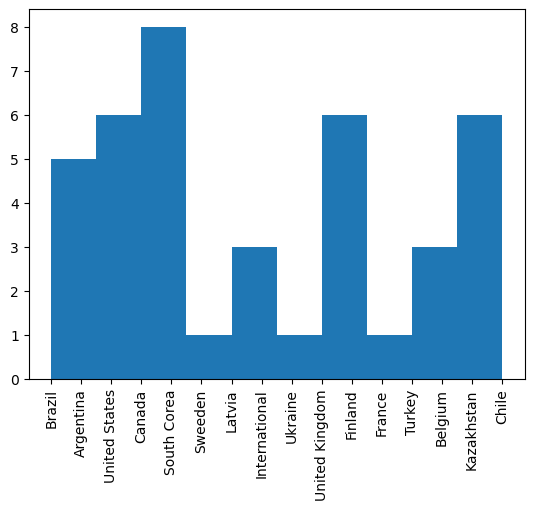

In [9]:
# Conforme o histograma abaixo, fica claro que o número de participantes da "Coreia do Sul" é maior entre todos os países.

plt.hist(dados['Nationality'])
plt.xticks(rotation=90)
plt.show()

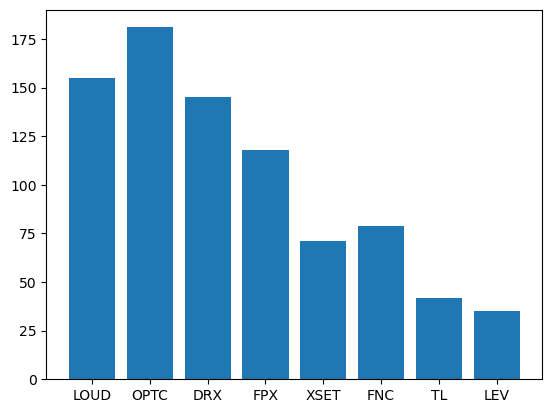

In [ ]:
# 'OPTC' venceu mais rounds altas e 'LEV' venceu menos rounds entre todas as equipes participantes.

plt.bar(dados['Team'], dados['Rounds Win'])

plt.show()

In [ ]:
# A porcentagem de vitórias da'LOUD' é de quase 70%, é por isso que ela está na posição 1.

dados['Win %'] = (dados['Rounds Win']/dados['Rounds Played'])*100

dados.head()

,Player,Team,Nationality,Kill,Death,K/D,KAST %,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank,Win %
0,Sacy,LOUD,Brazil,147,123,1.20,76,60000.0,Initiator,25.50,222,155,67,1,69.81982
1,saadhak,LOUD,Argentina,150,143,1.05,76,60000.0,Initiator,22.50,222,155,67,1,69.81982
2,pANcada,LOUD,Brazil,169,137,1.23,81,60000.0,Controller,36.75,222,155,67,1,69.81982
3,Less,LOUD,Brazil,176,134,1.31,73,60000.0,Sentinel,26.50,222,155,67,1,69.81982
4,aspas,LOUD,Brazil,166,158,1.05,71,60000.0,Duelist,26.25,222,155,67,1,69.81982


In [19]:
# "yay" dos Estados Unidos tem o maior número de abates.
dados.loc[dados['Kill'] == max(dados['Kill'])]

,Player,Team,Nationality,Kill,Death,K/D,KAST %,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank,Win %
5,yay,OPTC,United States,334,236,1.42,71,30000.0,Duelist,28.6,365,181,184,2,49.589041


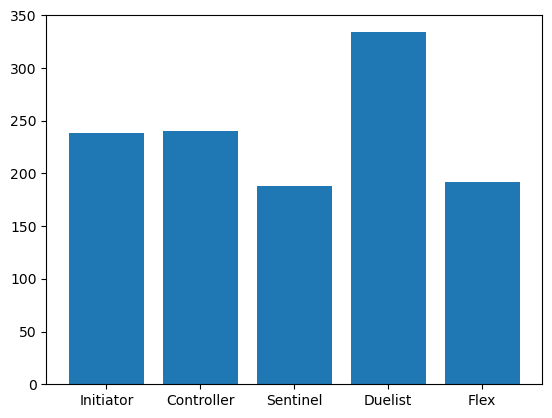

In [ ]:
# A classe com mais abates é a 'Duelist' (duelista)

plt.bar(dados['Role'], dados['Kill'])
plt.show()

In [23]:
# Jogadores com a melhor porcentagem de tiros na cabeça, em ordem decrescente
dados.loc[dados['HS %'] > 30].sort_values(by='HS %', ascending=False)

,Player,Team,Nationality,Kill,Death,K/D,KAST %,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank,Win %
13,stax,DRX,South Corea,192,207,0.93,69,22000.0,Initiator,38.80,313,145,168,3,46.325879
33,dimasick,TL,Kazakhstan,54,74,0.73,67,8000.0,Controller,38.50,81,42,39,7,51.851852
2,pANcada,LOUD,Brazil,169,137,1.23,81,60000.0,Controller,36.75,222,155,67,1,69.819820
12,Zest,DRX,South Corea,205,218,0.94,70,22000.0,Initiator,36.00,313,145,168,3,46.325879
30,Nivera,TL,Belgium,60,77,0.78,57,8000.0,Flex,33.50,81,42,39,7,51.851852
34,soulcas,TL,United Kingdom,63,75,0.84,70,8000.0,Initiator,33.50,81,42,39,7,51.851852
25,Derke,FNC,Finland,147,99,1.48,69,12000.0,Flex,33.33,152,79,73,6,51.973684
17,SUYGETSU,FPX,International,153,142,1.08,70,16000.0,Controller,33.00,214,118,96,4,55.140187
10,MaKo,DRX,South Corea,224,197,1.14,77,22000.0,Controller,31.20,313,145,168,3,46.325879
6,Marved,OPTC,Canada,240,252,0.95,73,30000.0,Controller,30.80,365,181,184,2,49.589041
